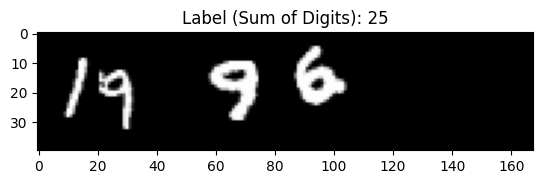

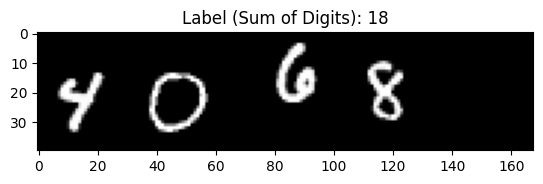

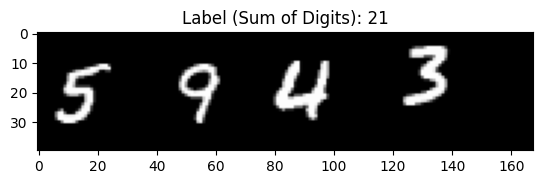

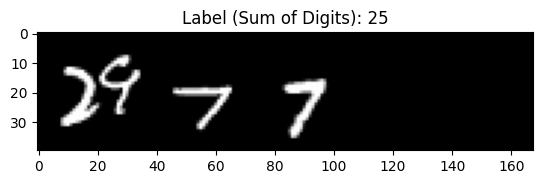

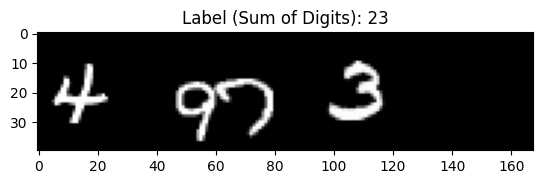

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data loading
data = np.load('data0.npy')
labels = np.load('lab0.npy')

# Normalizing the pixel values
data = data / 255.0

# Reshape data
data = data.reshape(data.shape[0], data.shape[1], data.shape[2], 1)

# Visualize a few images and their labels
for i in range(5):
    plt.imshow(data[i].squeeze(), cmap='gray')
    plt.title(f"Label (Sum of Digits): {labels[i]}")
    plt.show()


In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('trained_model.h5')

In [ ]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow.keras.backend as K
# making custom accuaracy fucntion for calulating accuracy
def custom_accuracy(y_true, y_pred):
    y_true = K.cast(y_true, dtype='float32')
    return K.mean(K.abs(y_true - y_pred) <= 5)

In [ ]:
baseline_model.compile(optimizer='adam', loss='mse', metrics=['mae', custom_accuracy])

250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step
Custom Accuracy (Training Set): 0.47505250573158264
Mean Absolute Error (Training Set): 2.3838398456573486


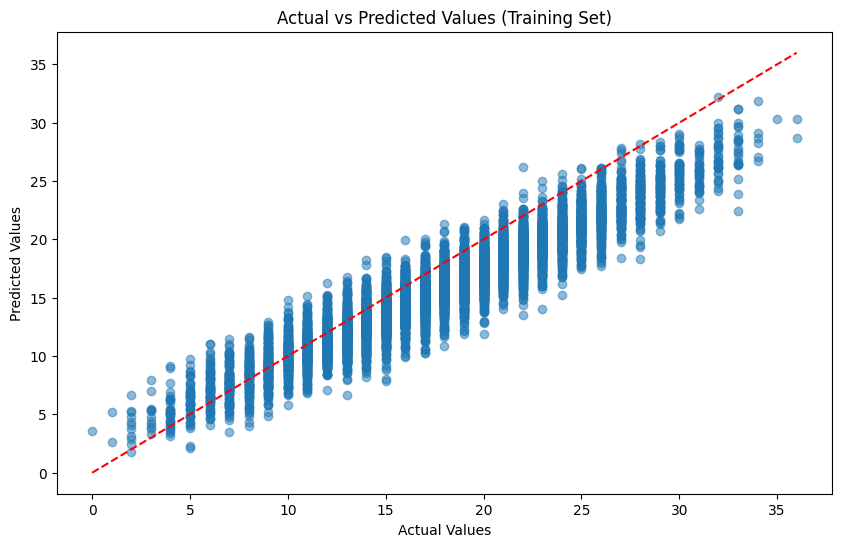

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Predicting using the trained model on the training set
y_pred_train = baseline_model.predict(X_train)

# Calculating MAE using the custom accuracy function
train_accuracy = custom_accuracy(y_train, y_pred_train).numpy()

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred_train)


print(f"Custom Accuracy (Training Set): {train_accuracy}")
print(f"Mean Absolute Error (Training Set): {mae}")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  # Perfect match line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.show()
